In [43]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter

In [44]:
#Reading the csv files

combined_df=pd.read_csv("Resources/combined.csv") #contains all the individual food items

merged_df=pd.read_csv("Resources/merged_data.csv").reset_index(drop=True) #contains the summary/total food production per country


In [45]:
#merged_df=merged_df.reset_index(drop=True)


VARIABLES

In [46]:
dropped_columns_df=combined_df.drop(['Item', 'Year', 'Unit', 'Population Size', 'GDP Per Capita', '2020 GDP in USD'], axis=1)

In [47]:
dropped_columns_df2=merged_df.drop(['Year', 'Population Size', 'GDP Per Capita', '2020 GDP in USD'], axis=1)
# grouped_dropped_columns_df2=dropped_columns_df2.groupby(['Country'])['Value']
# grouped_dropped_columns_df2.head()

In [48]:
#Group by country name, element=production, element=stocks, value

afghan_only=dropped_columns_df.loc[dropped_columns_df['Country'] =='Afghanistan']
afghan_only_crop=afghan_only.loc[afghan_only['Element']=='Production']
afghan_only_crop_total=afghan_only_crop['Value'].sum() 
afghan_only_crop_total=(int(afghan_only_crop_total))#***
afghan_only_livestock=afghan_only.loc[afghan_only['Element']=='Stocks']
afghan_only_livestock_total=afghan_only_livestock['Value'].sum()
afghan_only_livestock_total=(int(afghan_only_livestock_total))#***
afghan_only_crop_total

12479260

In [49]:
Nepal_only=dropped_columns_df.loc[dropped_columns_df['Country'] =='Nepal']
Nepal_only_crop=Nepal_only.loc[Nepal_only['Element']=='Production']
Nepal_only_crop_total=Nepal_only_crop['Value'].sum() 
Nepal_only_crop_total=(int(Nepal_only_crop_total))#***
Nepal_only_livestock=Nepal_only.loc[Nepal_only['Element']=='Stocks']
Nepal_only_livestock_total=Nepal_only_livestock['Value'].sum() 
Nepal_only_livestock_total=(int(Nepal_only_livestock_total))#***
Nepal_only_crop_total

24432963

In [50]:
Pakistan_only=dropped_columns_df.loc[dropped_columns_df['Country'] =='Pakistan']
Pakistan_only_crop=Pakistan_only.loc[Pakistan_only['Element']=='Production']
Pakistan_only_crop_total=Pakistan_only_crop['Value'].sum() 
Pakistan_only_crop_total=(int(Pakistan_only_crop_total))#***
Pakistan_only_livestock=Pakistan_only.loc[Pakistan_only['Element']=='Stocks']
Pakistan_only_livestock_total=Pakistan_only_livestock['Value'].sum()
Pakistan_only_livestock_total=(int(Pakistan_only_livestock_total))#***
Pakistan_only_crop_total

149767384

In [51]:
Bangladesh_only=dropped_columns_df.loc[dropped_columns_df['Country'] =='Bangladesh']
Bangladesh_only_crop=Bangladesh_only.loc[Bangladesh_only['Element']=='Production']
Bangladesh_only_crop_total=Bangladesh_only_crop['Value'].sum() 
Bangladesh_only_crop_total=(int(Bangladesh_only_crop_total))#***
Bangladesh_only_livestock=Bangladesh_only.loc[Bangladesh_only['Element']=='Stocks']
Bangladesh_only_livestock_total=Bangladesh_only_livestock['Value'].sum()
Bangladesh_only_livestock_total=(int(Bangladesh_only_livestock_total))#***
print(Bangladesh_only_crop_total, Bangladesh_only_livestock_total)

88583770 444503162


In [52]:
India_only=dropped_columns_df.loc[dropped_columns_df['Country'] =='India']
India_only_crop=India_only.loc[India_only['Element']=='Production']
India_only_crop_total=India_only_crop['Value'].sum() 
India_only_crop_total=(int(India_only_crop_total))#***
India_only_livestock=India_only.loc[India_only['Element']=='Stocks']
India_only_livestock_total=India_only_livestock['Value'].sum() 
India_only_livestock_total=(int(India_only_livestock_total))#***
print(India_only_crop_total, India_only_livestock_total)

1101656233 1371044381


In [53]:
Bhutan_only=dropped_columns_df.loc[dropped_columns_df['Country'] =='Bhutan']
Bhutan_only_crop=Bhutan_only.loc[Bhutan_only['Element']=='Production']
Bhutan_only_crop_total=Bhutan_only_crop['Value'].sum() 
Bhutan_only_crop_total=(int(Bhutan_only_crop_total))#***
Bhutan_only_livestock=Bhutan_only.loc[Bhutan_only['Element']=='Stocks']
Bhutan_only_livestock_total=Bhutan_only_livestock['Value'].sum() 
Bhutan_only_livestock_total=(int(Bhutan_only_livestock_total))#***
print(Bhutan_only_crop_total, Bhutan_only_livestock_total)

320661 1775546


In [54]:
SriLanka_only=dropped_columns_df.loc[dropped_columns_df['Country'] =='Sri Lanka']
SriLanka_only_crop=SriLanka_only.loc[SriLanka_only['Element']=='Production']
SriLanka_only_crop_total=SriLanka_only_crop['Value'].sum() 
SriLanka_only_crop_total=(int(SriLanka_only_crop_total))#***
SriLanka_only_livestock=SriLanka_only.loc[SriLanka_only['Element']=='Stocks']
SriLanka_only_livestock_total=SriLanka_only_livestock['Value'].sum() 
SriLanka_only_livestock_total=(int(SriLanka_only_livestock_total))#***
print(SriLanka_only_crop_total, SriLanka_only_livestock_total)

11220162 26158262


SCATTER PLOT:
Crops vs Livestock

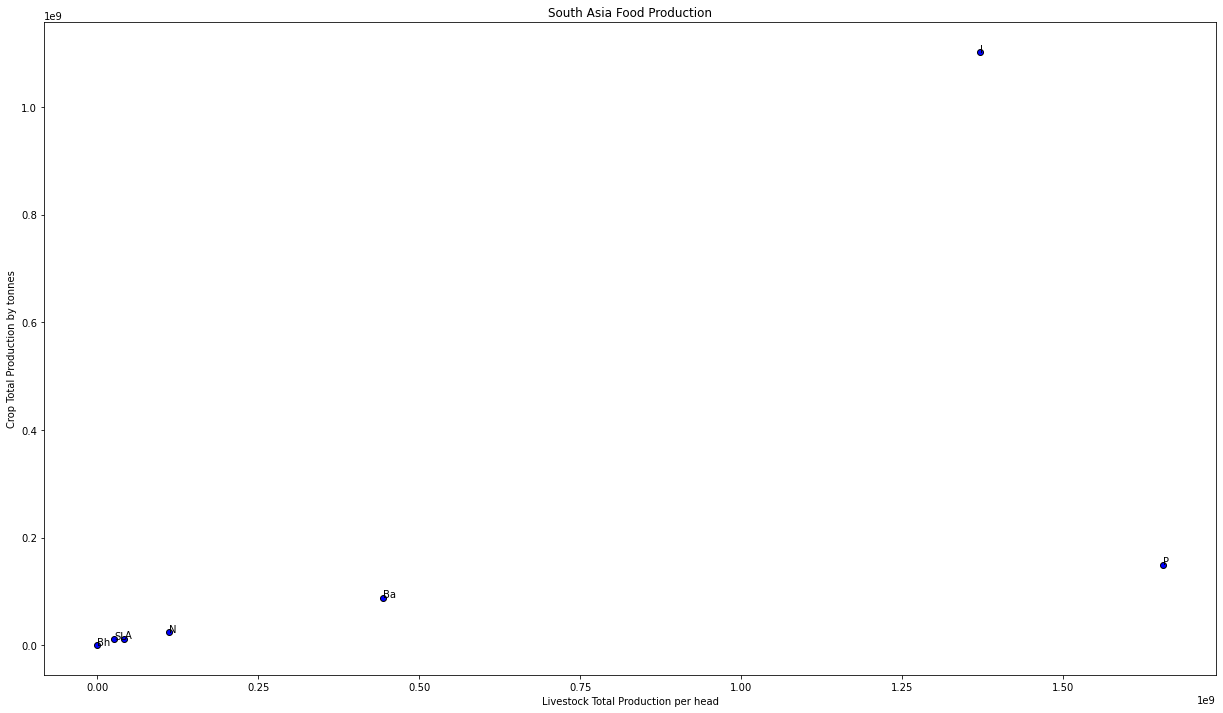

In [55]:
from __future__ import annotations


y_axis1=(India_only_crop_total, afghan_only_crop_total,  Pakistan_only_crop_total, Nepal_only_crop_total, Bangladesh_only_crop_total, Bhutan_only_crop_total, SriLanka_only_crop_total)
#country_list=['India', 'Afghanistan', 'Pakistan', 'Nepal', 'Bangladesh']
x_axis1=(India_only_livestock_total, afghan_only_livestock_total,  Pakistan_only_livestock_total, Nepal_only_livestock_total, Bangladesh_only_livestock_total, Bhutan_only_crop_total, SriLanka_only_livestock_total)
plt.figure(figsize=(21, 12))
annotations=['I', 'A', 'P', 'N', 'Ba', 'Bh', "SL"]
plt.scatter(x_axis1, y_axis1, marker="o", c='blue', edgecolors="black", label='Crops in tonnes; Livestock per head')
plt.ticklabel_format(useOffset=False)
plt.xlabel('Livestock Total Production per head')
plt.ylabel('Crop Total Production by tonnes')
plt.title('South Asia Food Production')


for i, label in enumerate(annotations):
    plt.annotate(label, (x_axis1[i], y_axis1[i]))
plt.savefig('Crops vs Livestock')

#how to get labels on each point. Will use first letter of each country per relevant point

BAR CHART: Total Food Production

In [56]:
#variables

# afghan_only2=dropped_columns_df2.loc[dropped_columns_df2['Country'] =='Afghanistan']
# afghan_only2=afghan_only2["Value"]
# Nepal_only2=dropped_columns_df2.loc[dropped_columns_df2['Country'] =='Nepal']
# Nepal_only2=Nepal_only2['Value']
# #Nepal_only2=Nepal_only2.loc[Nepal_only2.wd==1, 'Value'].values[0]
# Pakistan_only2=dropped_columns_df2.loc[dropped_columns_df2['Country'] =='Pakistan']
# Pakistan_only2=Pakistan_only2['Value']
# Bangladesh_only2=dropped_columns_df2.loc[dropped_columns_df2['Country'] =='Bangladesh']
# Bangladesh_only2=Bangladesh_only2['Value']
# India_only2=dropped_columns_df2.loc[dropped_columns_df2['Country'] =='India']
# India_only2=India_only2['Value']
# Nepal_only2


In [57]:
# y_axis2=(India_only2, afghan_only2,  Pakistan_only2, Nepal_only2, Bangladesh_only2)
# #x_axis2=('India', 'Afghanistan', 'Pakistan', 'Nepal', 'Bangladesh')
# x_axis2=np.arange(len(y_axis2))

In [58]:
filtered_data = merged_df[merged_df['Country'].isin(['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Nepal', 'Pakistan', 'Sri Lanka'])].reset_index(drop=True)
filtered_data

,Country,Year,Value,Population Size,2020 GDP in USD,GDP Per Capita
0,Afghanistan,2020,5.477190e+07,3.892834e+07,2.011614e+10,516.747871
1,Bangladesh,2020,5.330869e+08,1.646894e+08,3.739021e+11,2270.347535
2,Bhutan,2020,2.096207e+06,7.716120e+05,2.315436e+09,3000.777986
3,India,2020,2.472701e+09,1.380004e+09,2.667688e+12,1933.101069
4,Nepal,2020,1.353131e+08,2.913681e+07,3.343367e+10,1147.471971
5,Pakistan,2020,1.804460e+09,2.208923e+08,3.003063e+11,1359.514522
6,Sri Lanka,2020,3.737842e+07,2.191900e+07,8.096968e+10,3694.040948


In [59]:
x_axis2 = np.array(filtered_data["Country"])
x_axis2

y_axis2 = np.array(filtered_data["Value"])
y_axis2

array([5.47718980e+07, 5.33086932e+08, 2.09620700e+06, 2.47270061e+09,
       1.35313064e+08, 1.80446048e+09, 3.73784240e+07])

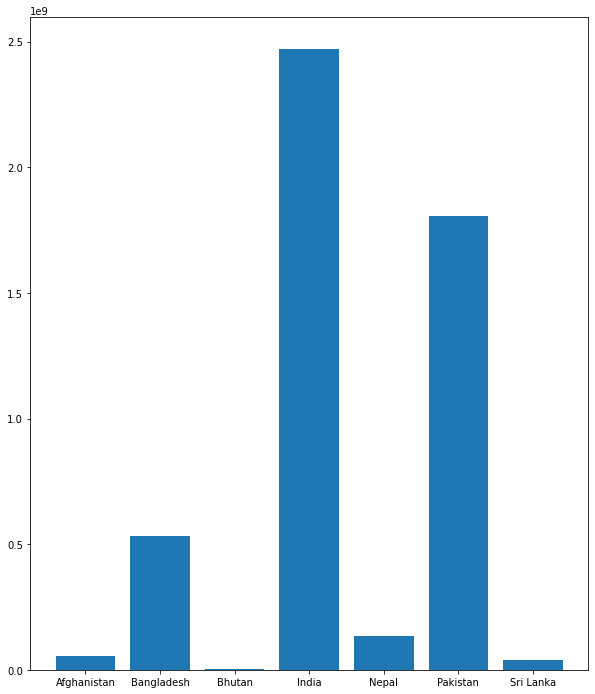

In [60]:

plt.figure(figsize=(10, 12))
plt.bar(x_axis2, y_axis2)
plt.savefig('Total Food Production')

PIE CHART: Food production as a whole 

In [61]:
y_axis2

array([5.47718980e+07, 5.33086932e+08, 2.09620700e+06, 2.47270061e+09,
       1.35313064e+08, 1.80446048e+09, 3.73784240e+07])

In [62]:
#labels:['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Nepal', 'Pakistan', 'Sri Lanka']
labels=['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Nepal', 'Pakistan', 'Sri Lanka']
country_data=y_axis2
colors = ["springgreen", "orange", "lightcoral", "lightskyblue","mediumpurple", "chocolate", "gold"]

<function matplotlib.pyplot.show(close=None, block=None)>

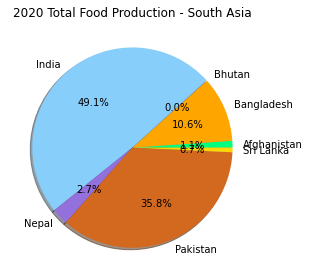

In [68]:
# plt.figure(figsize=(8, 8))
plt.pie(country_data, colors=colors, labels=labels,
        autopct="%1.1f%%", shadow=True)
plt.title('2020 Total Food Production - South Asia')
plt.tight_layout() #doing this just made the chart bigger, but it is actually kind of helpful doing that
plt.savefig('Food Production Pie Chart')
plt.show